# Word Embedding Mini Task

In [1]:
# 1. Import Required Libraries
import gensim.downloader as api
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
import sys
print(sys.executable)
print(sys.version)
import gensim
print(gensim.__version__)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]
4.4.0


In [4]:
# 2. Load Pretrained Word2Vec and GloVe Embeddings

word2vec_model = api.load('word2vec-google-news-300')
# Load GloVe
glove_model = api.load('glove-wiki-gigaword-100')

In [5]:
# 3. Find Similar Words
print('Word2Vec similar to "king":')
print(word2vec_model.most_similar('king', topn=5))

print('\nGloVe similar to "king":')
print(glove_model.most_similar('king', topn=5))

Word2Vec similar to "king":
[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474)]

GloVe similar to "king":
[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175)]


In [6]:
# 4. Word Analogy: king - man + woman
print('Word2Vec analogy (king - man + woman):')
print(word2vec_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1))

print('\nGloVe analogy (king - man + woman):')
print(glove_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1))

Word2Vec analogy (king - man + woman):
[('queen', 0.7118193507194519)]

GloVe analogy (king - man + woman):
[('queen', 0.7698540687561035)]


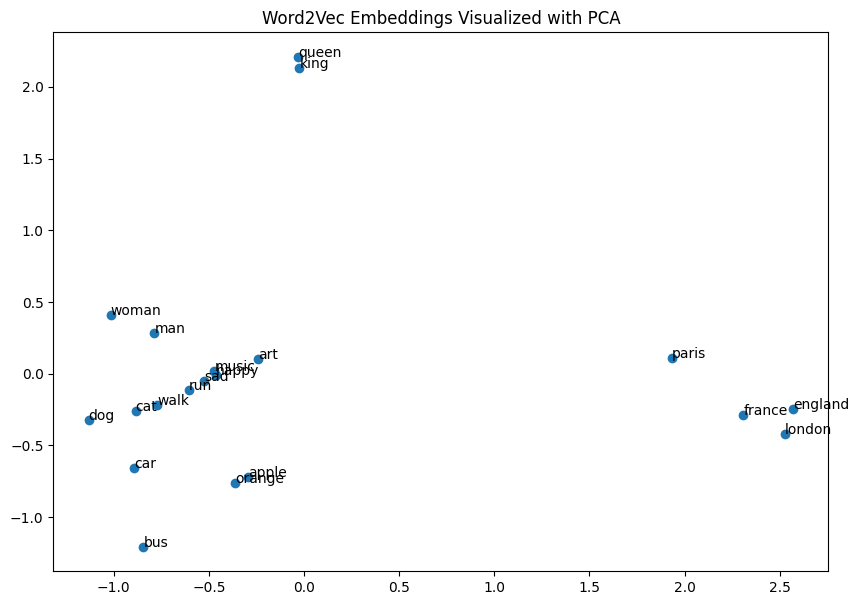

In [7]:
# 5. Visualize Word Embeddings with PCA
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'paris', 'france', 'london', 'england', 'dog', 'cat', 'car', 'bus', 'happy', 'sad', 'run', 'walk', 'music', 'art']

# Get vectors for the words from Word2Vec
def get_vectors(model, words):
    return np.array([model[w] for w in words if w in model]), [w for w in words if w in model]

vecs, valid_words = get_vectors(word2vec_model, words)
pca = PCA(n_components=2)
vecs_2d = pca.fit_transform(vecs)

plt.figure(figsize=(10,7))
plt.scatter(vecs_2d[:,0], vecs_2d[:,1])
for i, word in enumerate(valid_words):
    plt.annotate(word, (vecs_2d[i,0], vecs_2d[i,1]))
plt.title('Word2Vec Embeddings Visualized with PCA')
plt.show()

In [8]:
# Compare Word2Vec vs GloVe Similarity Results
pairs = [('king', 'queen'), ('man', 'woman'), ('apple', 'orange'), ('paris', 'france'), ('dog', 'cat')]

for w1, w2 in pairs:
    if w1 in word2vec_model and w2 in word2vec_model:
        sim_w2v = word2vec_model.similarity(w1, w2)
    else:
        sim_w2v = 'N/A'
    if w1 in glove_model and w2 in glove_model:
        sim_glove = glove_model.similarity(w1, w2)
    else:
        sim_glove = 'N/A'
    print(f"Similarity between '{w1}' and '{w2}': Word2Vec={sim_w2v}, GloVe={sim_glove}")

Similarity between 'king' and 'queen': Word2Vec=0.6510956287384033, GloVe=0.7507690787315369
Similarity between 'man' and 'woman': Word2Vec=0.7664012312889099, GloVe=0.832349419593811
Similarity between 'apple' and 'orange': Word2Vec=0.3920346200466156, GloVe=0.5007039904594421
Similarity between 'paris' and 'france': Word2Vec=0.5550795793533325, GloVe=0.7481586933135986
Similarity between 'dog' and 'cat': Word2Vec=0.760945737361908, GloVe=0.8798074722290039


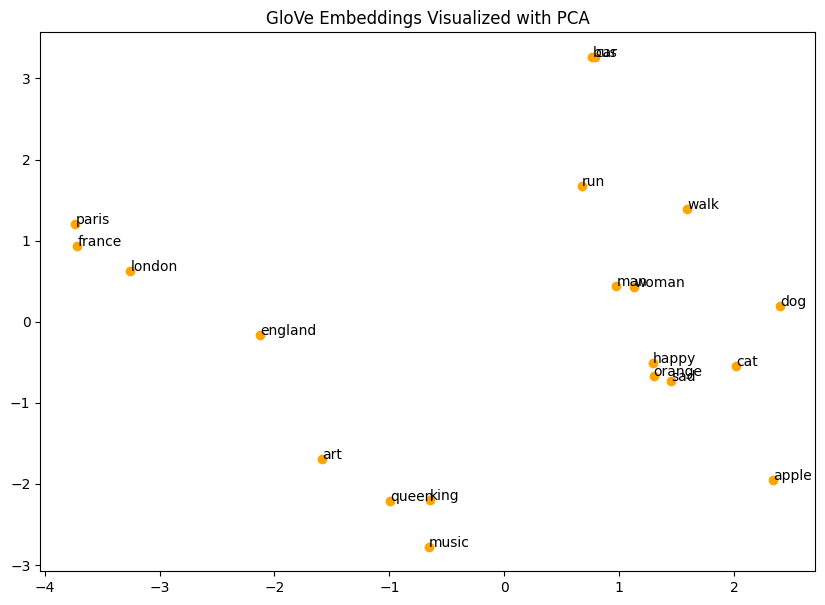

In [9]:
# 6. 2D Visualization of GloVe Embeddings with PCA
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'paris', 'france', 'london', 'england', 'dog', 'cat', 'car', 'bus', 'happy', 'sad', 'run', 'walk', 'music', 'art']

# Get vectors for the words from GloVe
vecs_glove, valid_words_glove = get_vectors(glove_model, words)
pca_glove = PCA(n_components=2)
vecs_2d_glove = pca_glove.fit_transform(vecs_glove)

plt.figure(figsize=(10,7))
plt.scatter(vecs_2d_glove[:,0], vecs_2d_glove[:,1], color='orange')
for i, word in enumerate(valid_words_glove):
    plt.annotate(word, (vecs_2d_glove[i,0], vecs_2d_glove[i,1]))
plt.title('GloVe Embeddings Visualized with PCA')
plt.show()